<a href="https://colab.research.google.com/github/AmirGhnbr/technical_analysis_of_stocks/blob/main/technical_analysis_of_stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance ta mplfinance plotly

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 kB 4.9 MB/s eta 0:00:00
  Created wheel for ta: filename=ta-0.10.2-py3-none-any.whl size=29088 sha256=0460640e255649b35d34b2a063d48b6d6252205e4e96423562c3313557d579dd
  Stored in directory: /root/.cache/pip/wheels/47/51/06/380dc516ea78621870b93ff65527c251afdfdc5fa9d7f4d248
Successfully built ta


In [2]:
url = 'https://anaconda.org/conda-forge/libta-lib/0.4.0/download/linux-64/libta-lib-0.4.0-h166bdaf_1.tar.bz2'
!curl -L $url | tar xj -C /usr/lib/x86_64-linux-gnu/ lib --strip-components=1
url = 'https://anaconda.org/conda-forge/ta-lib/0.4.19/download/linux-64/ta-lib-0.4.19-py310hde88566_4.tar.bz2'
!curl -L $url | tar xj -C /usr/local/lib/python3.10/dist-packages/ lib/python3.10/site-packages/talib --strip-components=3

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4251    0  4251    0     0  15981      0 --:--:-- --:--:-- --:--:-- 15981
100  517k  100  517k    0     0   826k      0 --:--:-- --:--:-- --:--:--  826k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4275    0  4275    0     0  17887      0 --:--:-- --:--:-- --:--:-- 18037
100  392k  100  392k    0     0   765k      0 --:--:-- --:--:-- --:--:--  765k


In [3]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

sns.set_theme(context="talk", style="whitegrid",
              palette="colorblind", color_codes=True,
              rc={"figure.figsize": [12, 8]})

In [5]:
import pandas as pd
import yfinance as yf
import talib

In [6]:
import datetime
now = datetime.datetime.now()
data = yf.download('BTC-USD',
                   start='2022-01-01',
                   end = now,
                   progress= False,
                   auto_adjust=True)
data

,Open,High,Low,Close,Volume
Date,,,,,
2022-01-01,46311.746094,47827.312500,46288.484375,47686.812500,24582667004
2022-01-02,47680.925781,47881.406250,46856.937500,47345.218750,27951569547
2022-01-03,47343.542969,47510.726562,45835.964844,46458.117188,33071628362
2022-01-04,46458.851562,47406.546875,45752.464844,45897.574219,42494677905
2022-01-05,45899.359375,46929.046875,42798.222656,43569.003906,36851084859
...,...,...,...,...,...
2023-06-30,30441.353516,31256.863281,29600.275391,30477.251953,26387306197
2023-07-01,30471.847656,30641.289062,30328.865234,30590.078125,9086606733
2023-07-02,30587.269531,30766.140625,30264.019531,30620.769531,10533418042


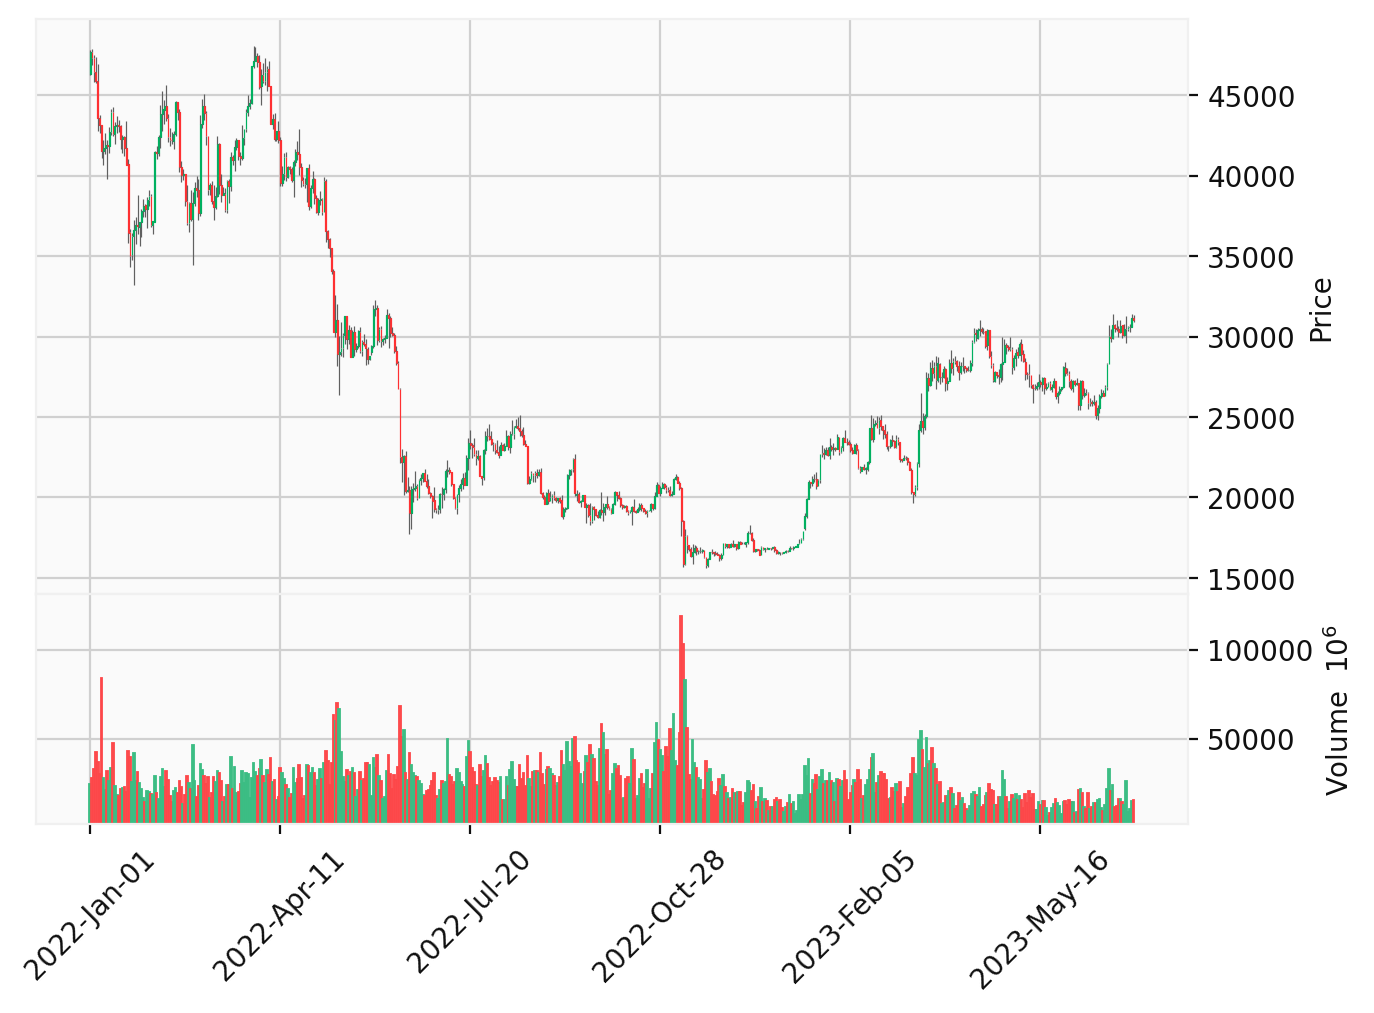

In [7]:
import mplfinance as mpf
mpf.plot(data, type='candle',style='yahoo',volume=True)

## Turn the candles to heikin ashi and plot interactive plotly plot


In [8]:
data['HA_Close'] = (data['Open'] + data['High'] + data['Low'] + data['Close']) / 4
data['HA_Open'] = (data['Open'].shift(1) + data['Close'].shift(1)) / 2
data['HA_High'] = data[['High', 'HA_Open', 'HA_Close']].max(axis=1)
data['HA_Low'] = data[['Low', 'HA_Open', 'HA_Close']].min(axis=1)


In [19]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=data.index,
                open=data['HA_Open'],
                high=data['HA_High'],
                low=data['HA_Low'],
                close=data['HA_Close'])])

fig.show()


## Let's calculate the SMA

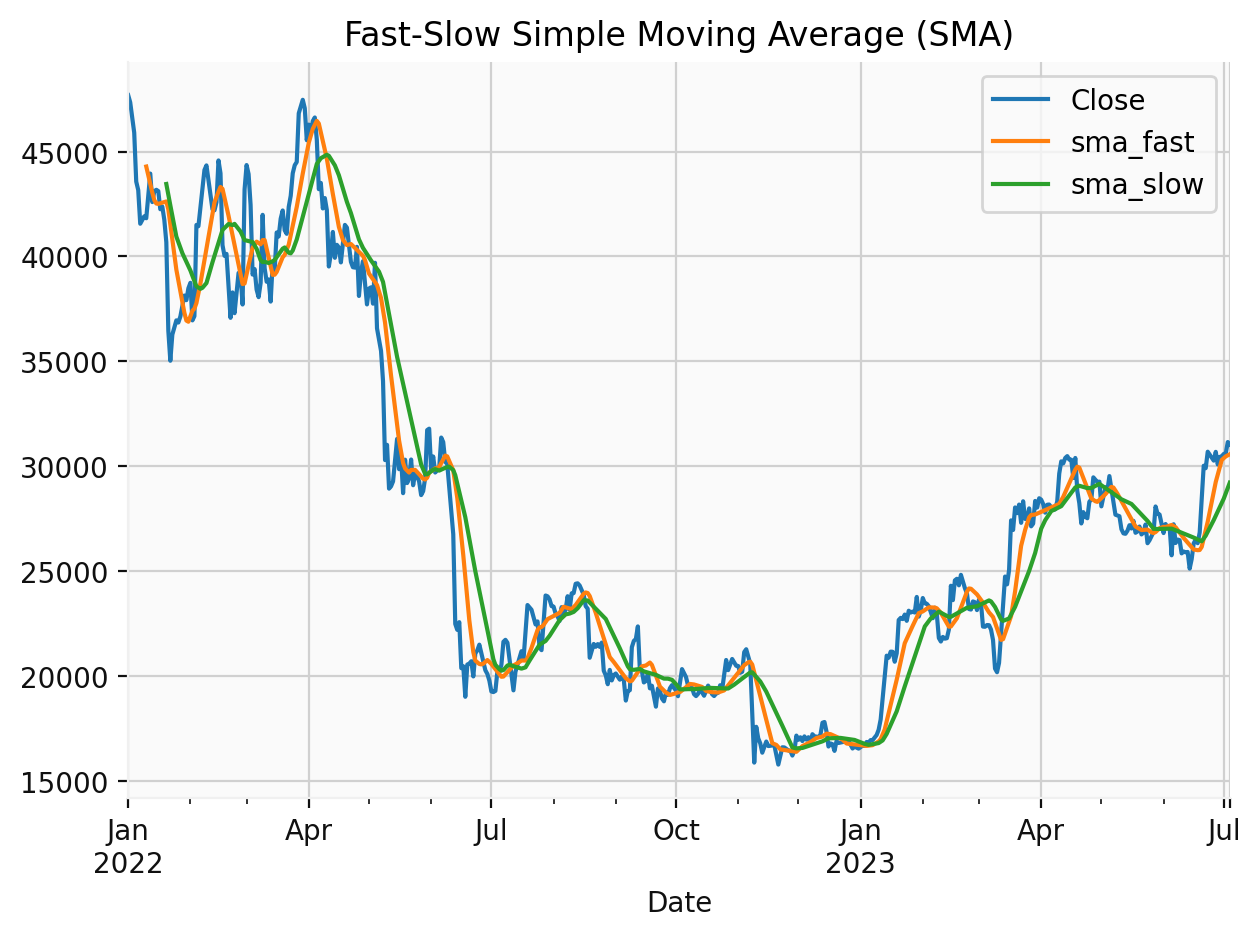

In [10]:
data['sma_slow'] = talib.SMA(data['HA_Close'], timeperiod=20)
data['sma_fast'] = talib.SMA(data['HA_Close'], timeperiod=10)
(
    data[["Close", "sma_fast",'sma_slow']]
    .plot(title="Fast-Slow Simple Moving Average (SMA)")
)

sns.despine()
plt.tight_layout()

## Analysing the Bolinger Bnads

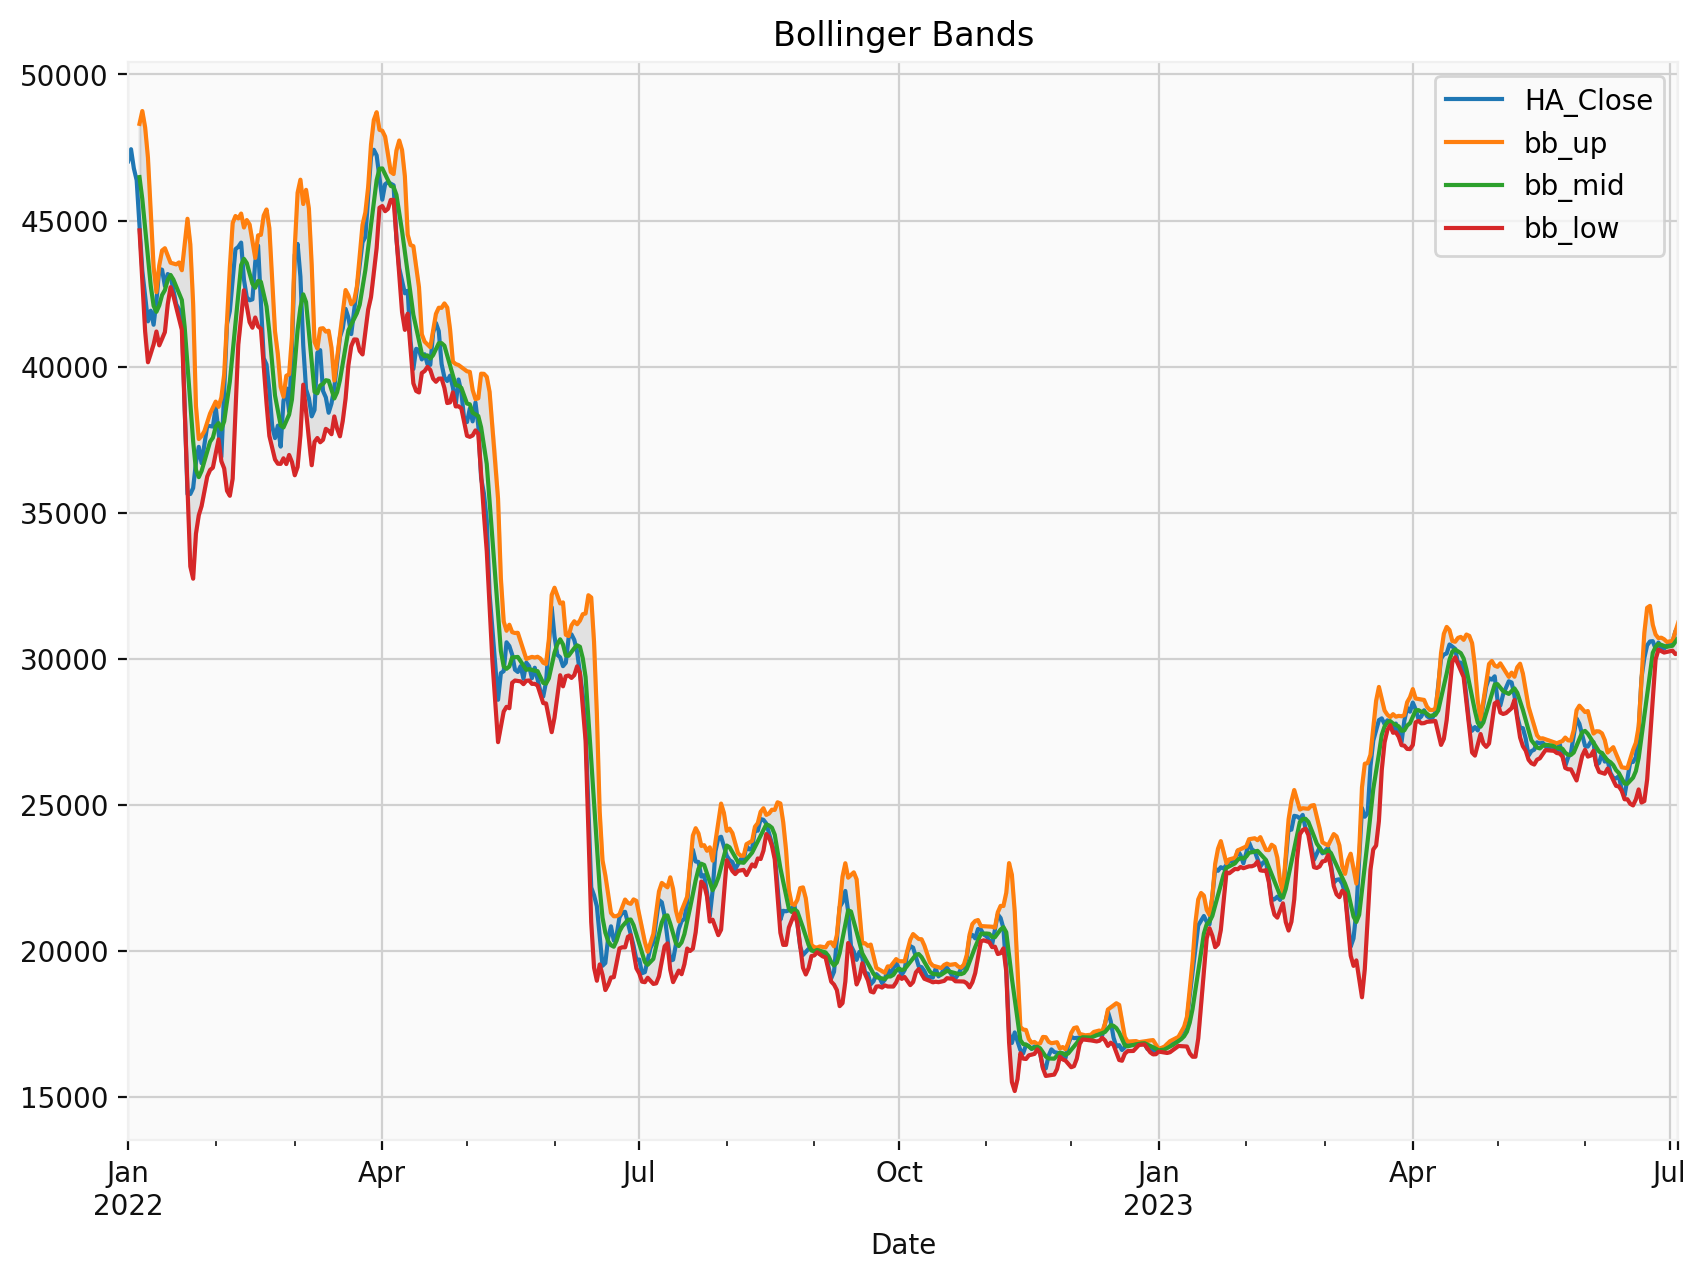

In [14]:
data['bb_up'], data['bb_mid'], data['bb_low'] = talib.BBANDS(data['HA_Close'])

fig, ax = plt.subplots()

(
    data.loc[:, ["HA_Close", "bb_up", "bb_mid", "bb_low"]]
    .plot(ax=ax, title="Bollinger Bands",figsize=(10,7))
)

ax.fill_between(data.index, data["bb_low"], data["bb_up"],
                color="gray",
                alpha=.2);

## Calculating the rsi

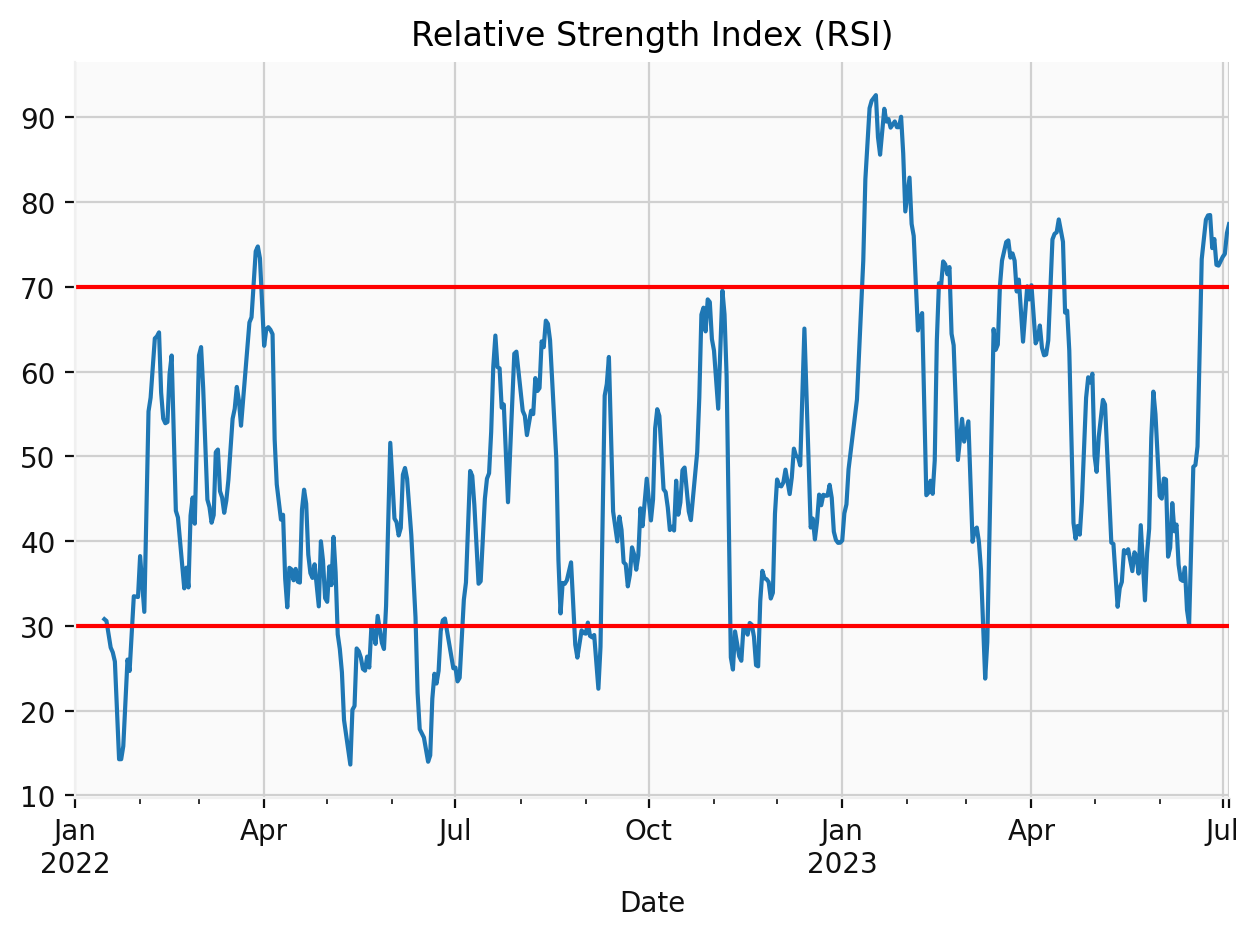

In [18]:
data['rsi'] = talib.RSI(data['HA_Close'])

fig,ax = plt.subplots()

data['rsi'].plot(ax=ax,title='Relative Strength Index (RSI)')

ax.hlines(y=30,
          xmin=data.index.min(),
          xmax=data.index.max(),
          color="red")
ax.hlines(y=70,
          xmin=data.index.min(),
          xmax=data.index.max(),
          color="red")

sns.despine()
plt.tight_layout()

## Calculating the MACD

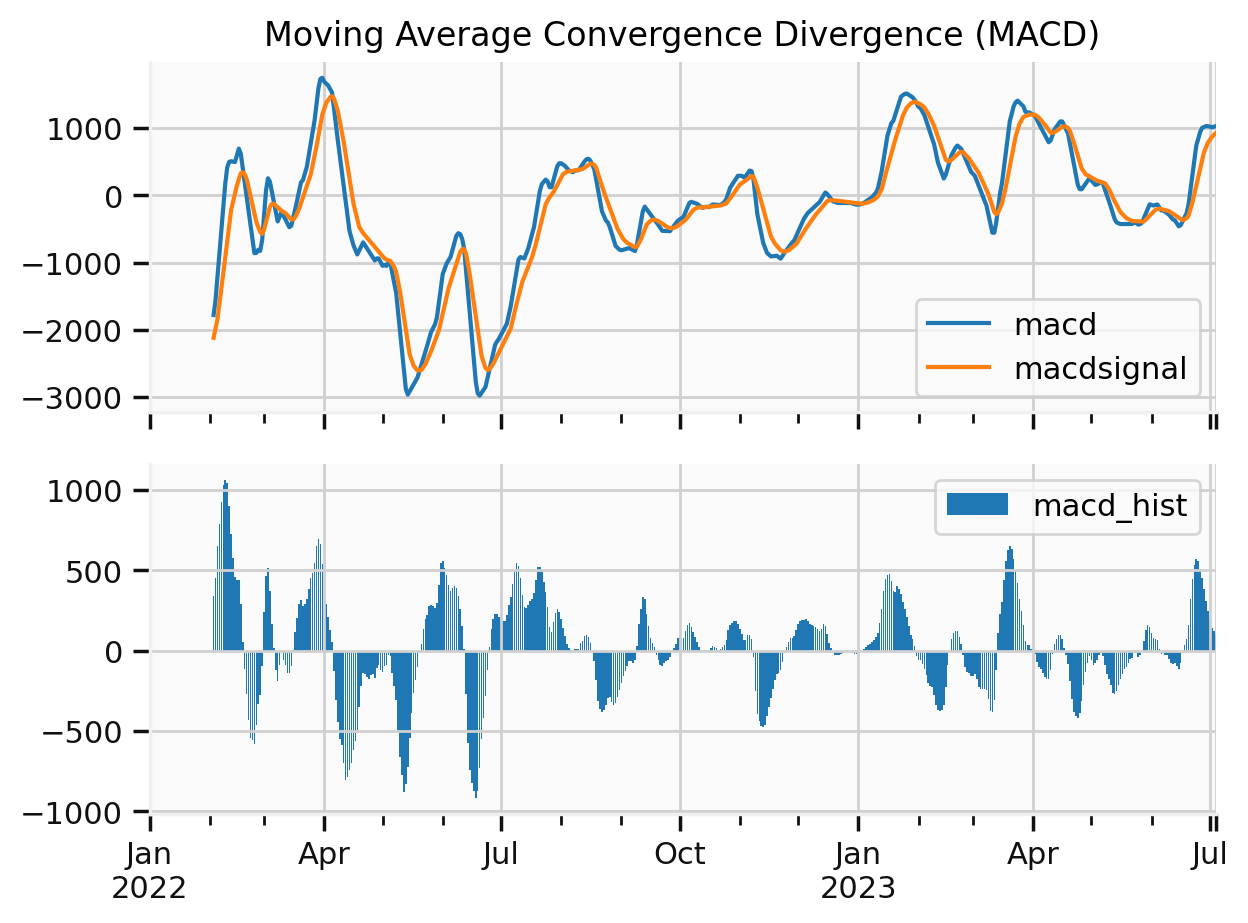

In [20]:
data["macd"], data["macdsignal"], data["macdhist"] = talib.MACD(
    data["HA_Close"], fastperiod=12, slowperiod=26, signalperiod=9
)

with sns.plotting_context("notebook"):
    fig, ax = plt.subplots(2, 1, sharex=True)

    (
        data[["macd", "macdsignal"]].
        plot(ax=ax[0],
             title="Moving Average Convergence Divergence (MACD)")
    )
    ax[1].bar(data.index, data["macdhist"].values, label="macd_hist")
    ax[1].legend()

    sns.despine()
    plt.tight_layout()

## Calculate all of the technical indicators using ta library

This Ability is useful when trying to feed this technical data to deep learning models to inference.

In [24]:
from ta import add_all_ta_features

data_copy = data[['HA_Open','HA_High','HA_Close','HA_Low','Volume']].copy()

df = add_all_ta_features(data_copy, open="HA_Open", high="HA_High",
                         low="HA_Low", close="HA_Close",
                         volume="Volume")
df.columns

/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning:

invalid value encountered in double_scalars

/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning:

invalid value encountered in double_scalars



Index(['HA_Open', 'HA_High', 'HA_Close', 'HA_Low', 'Volume', 'volume_adi',
       'volume_obv', 'volume_cmf', 'volume_fi', 'volume_em', 'volume_sma_em',
       'volume_vpt', 'volume_vwap', 'volume_mfi', 'volume_nvi',
       'volatility_bbm', 'volatility_bbh', 'volatility_bbl', 'volatility_bbw',
       'volatility_bbp', 'volatility_bbhi', 'volatility_bbli',
       'volatility_kcc', 'volatility_kch', 'volatility_kcl', 'volatility_kcw',
       'volatility_kcp', 'volatility_kchi', 'volatility_kcli',
       'volatility_dcl', 'volatility_dch', 'volatility_dcm', 'volatility_dcw',
       'volatility_dcp', 'volatility_atr', 'volatility_ui', 'trend_macd',
       'trend_macd_signal', 'trend_macd_diff', 'trend_sma_fast',
       'trend_sma_slow', 'trend_ema_fast', 'trend_ema_slow',
       'trend_vortex_ind_pos', 'trend_vortex_ind_neg', 'trend_vortex_ind_diff',
       'trend_trix', 'trend_mass_index', 'trend_dpo', 'trend_kst',
       'trend_kst_sig', 'trend_kst_diff', 'trend_ichimoku_conv',
       '